In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('Dataset2_2023.csv')

In [3]:
df.head()

,Unnamed: 0.1,Unnamed: 0,State,District,Date,Rainfall,Flood,Latitude,Longitude,Elevation (m)_x,...,Humidity (%),River Discharge (m³/s),Water Level (m),Elevation (m)_y,Land Cover,Soil Type,Population Density,Infrastructure,Historical Floods,Flood Occurred
0,0,2744,Bihar,Patna,04-01-2023,0.0,0,34.7,72.1,1608,...,31.322464,4975.408061,2.110030,5727.146513,Desert,Peat,1407.616322,0,1,0
1,1,2744,Bihar,Patna,04-01-2023,0.0,0,36.6,75.2,1023,...,67.329905,250.663334,3.292511,2316.118042,Urban,Clay,7558.937831,0,1,1
2,2,2744,Bihar,Patna,04-01-2023,0.0,0,36.4,96.8,2615,...,66.867524,1662.912233,0.430302,4420.732681,Water Body,Silt,824.925695,0,1,1
3,3,2744,Bihar,Patna,04-01-2023,0.0,0,14.1,81.8,2253,...,43.634105,3243.247793,5.420973,1894.934438,Urban,Silt,7758.508301,1,0,0
4,4,2744,Bihar,Patna,04-01-2023,0.0,0,14.1,81.8,2253,...,30.614337,645.553033,9.887126,115.861789,Agricultural,Peat,8130.789607,0,1,1


In [4]:
rows_with_zero = df[df['Flood'] == 0]

# Randomly sample 50% (or desired fraction) of rows where ColumnA is 0
rows_to_remove = rows_with_zero.sample(frac=0.9975, random_state=42)

# Remove the sampled rows from the original DataFrame
df = df.drop(rows_to_remove.index)

In [21]:
X = df[['Rainfall','River Discharge (m³/s)','Water Level (m)']]
y = df['Flood']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [7]:
y_train[y_train==0].count()

211

In [8]:
X_train.shape

(399, 3)

In [9]:
from sklearn.preprocessing import OneHotEncoder

In [10]:
ohe = OneHotEncoder(handle_unknown='ignore',sparse_output=False).set_output(transform='pandas')
ohetransform = ohe.fit_transform(df[['State']])

In [11]:
ohetransform.head()

,State_Bihar,State_Gujarat,State_Haryana,State_Jammu & Kashmir,State_Jharkhand,State_Madhya Pradesh,State_Maharashtra,State_Punjab,State_Rajasthan,State_Tamil Nadu,State_Telangana,State_Uttar Pradesh,State_West Bengal
206,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
769,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
854,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
860,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1016,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
X2 = pd.concat([ohetransform,df.iloc[:,4]],axis=1)
y2 = df['Flood']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X2,y2,random_state=42)

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
rf = RandomForestClassifier(random_state=42)

In [23]:
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [24]:
y_pred = rf.predict(X_test)

In [25]:
rf.score(X_test,y_test)

0.6466165413533834

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [27]:
accuracy_score(y_test,y_pred)

0.6466165413533834

In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.62      0.65        71
           1       0.61      0.68      0.64        62

    accuracy                           0.65       133
   macro avg       0.65      0.65      0.65       133
weighted avg       0.65      0.65      0.65       133



In [57]:
import matplotlib.pyplot as plt

In [58]:
X.columns

Index(['Rainfall', 'River Discharge (m³/s)', 'Water Level (m)'], dtype='object')

In [59]:
n = len(X.columns)

In [60]:
n

3

In [66]:
x = X.iloc[:, 2].tolist()

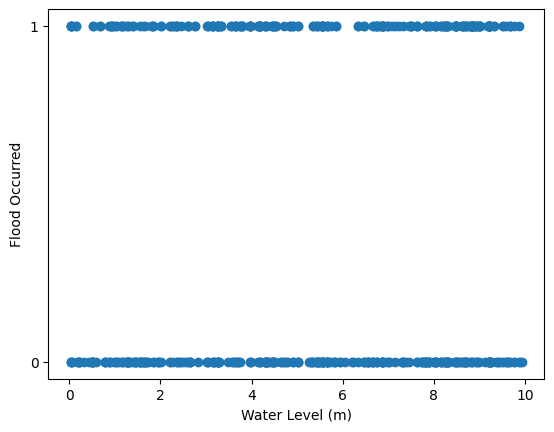

In [67]:
plt.scatter(x,y)
plt.xlabel(X.columns[2])
plt.ylabel('Flood Occurred')
plt.yticks([0,1])
plt.show()

In [31]:
import joblib
joblib.dump(rf, 'mark_1.pkl')  # Save
#rf = joblib.load('mark_1.pkl')  # Load


['mark_1.pkl']